# Lesson 4 Hands On --  Marcy -- 

### Part 1 - show histogram with 7 bars

In [1]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
boats = pd.read_csv("L3P1.csv")

In [2]:
boats.head()

Power Boats (in 1000's)
0                      436
1                      449
2                      470
3                      487
4                      502

array([[<AxesSubplot:title={'center':"Power Boats (in 1000's)"}>]],
      dtype=object)

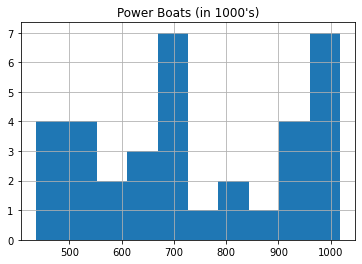

In [3]:
boats.hist() #Here's one way to run a histogram, but it doesn't have 7 bars


### Here's what the lesson says to do:

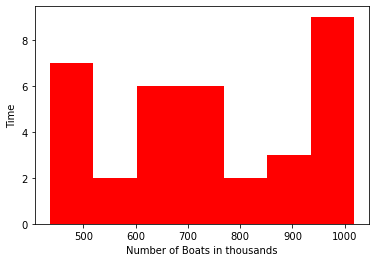

In [4]:
num_bins = 7
n, bins, patches = plt.hist(boats, num_bins, facecolor = 'red', alpha = 1)
plt.xlabel('Number of Boats in thousands')
plt.ylabel('Time')
plt. show()

### Part 2 create a bar graph

In [5]:
cars = pd.read_csv('L3P2.csv')

In [6]:
cars.head()

Cars
0  Mitsubishi
1  Mitsubishi
2       Dodge
3  Mitsubishi
4       Dodge

In [7]:
cars.value_counts()

Cars      
Jaguar        27
Dodge         18
Ford          17
Mitsubishi    15
Datsun         9
dtype: int64

Text(0.5, 1.0, 'Dandelion Dream Car Inventory')

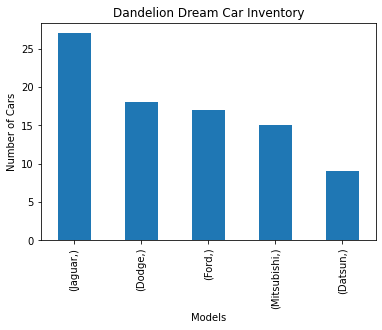

In [8]:
carfreq = cars.value_counts().plot(kind='bar')
carfreq.set_xlabel('Models')
carfreq.set_ylabel('Number of Cars')
carfreq.set_title('Dandelion Dream Car Inventory')

### Part 3 Make a stacked bar chart

In [9]:
carLoc = pd.read_csv('L3Part3.csv')
crosstab_df = pd.crosstab(carLoc ['Car'], carLoc['Location'])
crosstab_df.plot.bar(stacked = True)

<AxesSubplot:xlabel='Car'>

### Part 4 Scatter plot of crocs

In [10]:
crocs = pd.read_csv('crocodiles.csv')

In [11]:
crocs.head()

CommonName  HeadLength  BodyLength
0  Estuarine Crocodile          24         161
1  Estuarine Crocodile          24         179
2  Estuarine Crocodile          32         226
3  Estuarine Crocodile          35         259
4  Estuarine Crocodile          40         287

Text(0, 0.5, 'Body Length')

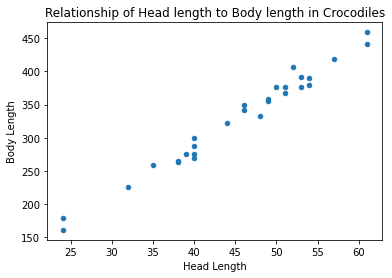

In [12]:
crocplot = crocs.plot.scatter(x = 'HeadLength', y= 'BodyLength')
crocplot.set_title ('Relationship of Head length to Body length in Crocodiles')
crocplot.set_xlabel ('Head Length')
crocplot.set_ylabel ('Body Length')

### Part 5 - Line chart with heart attacks

In [13]:
hearts = pd.read_csv('L6handson.csv')

In [14]:
hearts.head()

Month Day  Year  Heart Attacks
0   May  1,  2003             12
1   May  2,  2003             12
2   May  3,  2003              6
3   May  4,  2003             16
4   May  5,  2003             13

In [15]:
hearts['Date'] = hearts['Month'].astype(str) + " " + hearts['Day'].astype(str) + " " +hearts['Year'].astype(str)

In [16]:
plt.plot(hearts['Date'], hearts['Heart Attacks'])
plt.xticks([0, 15, 30, 45, 60, 75, 90], ['May 1,', 'May 16', 'May 31', 'June 1', 'June 3', 'July 1', 'July 3'], rotation=25)
plt.xlabel('Date')
plt.ylabel("Number of Heart Attacks")
plt.title('Heart Attacks over a 3-month period')
plt.show()

# Playing around with date time formats. Not part of assignment. 

In [17]:
hearts['Date'] = pd.to_datetime(hearts['Date'])

In [22]:
hearts["DayOfWeek"] = hearts['Date'].dt.dayofweek

In [23]:
hearts["day"] = hearts['Date'].dt.day

In [24]:
hearts["week"] = hearts['Date'].dt.week

<ipython-input-24-1834e77e5b94>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  hearts["week"] = hearts['Date'].dt.week


In [25]:
hearts["leapyear"] = hearts['Date'].dt.is_leap_year

In [30]:
hearts

Month  Day  Year  Heart Attacks       Date  DayOfWeek  day  week  leapyear
0    May   1,  2003             12 2003-05-01          3    1    18     False
1    May   2,  2003             12 2003-05-02          4    2    18     False
2    May   3,  2003              6 2003-05-03          5    3    18     False
3    May   4,  2003             16 2003-05-04          6    4    18     False
4    May   5,  2003             13 2003-05-05          0    5    19     False
..   ...  ...   ...            ...        ...        ...  ...   ...       ...
86  July  26,  2003             17 2003-07-26          5   26    30     False
87  July  27,  2003             19 2003-07-27          6   27    30     False
88  July  28,  2003             27 2003-07-28          0   28    31     False
89  July  29,  2003             11 2003-07-29          1   29    31     False
90  July  30,  2003             18 2003-07-30          2   30    31     False

[91 rows x 9 columns]

In [29]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
cal = calendar()
holidays = cal.holidays(start=hearts.min(), end=hearts.max())
hearts['Holiday'] = hearts['Date'].isin(holidays)

TypeError: Cannot convert input [Month                           July
Day                               1,
Year                            2003
Heart Attacks                      5
Date             2003-05-01 00:00:00
DayOfWeek                          0
day                                1
week                              18
leapyear                       False
dtype: object] of type <class 'pandas.core.series.Series'> to Timestamp